In [16]:
import sys
sys.path.append('/home/pmontesa/code/geoscitools')
import atl08lib
import maplib
import pandas as pd
import geopandas as gpd

%matplotlib inline

In [17]:
import os
os.sys.path.append('/home/pmontesa/code/icesat2')
import FilterUtils

Misc info:
https://colab.research.google.com/github/giswqs/qgis-earthengine-examples/blob/master/Folium/ee-api-folium-setup.ipynb

### After CMR process on DaskHub, insert ADAPT path across list of granules and run extraction (and, optionally, filtering) with shell script
pdsh -g ilab,forest do_extract_filter_atl08.sh \"2018 2019 2020 2021\" /att/nobackup/pmontesa/userfs02/data/icesat2/list_atl08.005 senegal
- Still need to run this

pdsh -g ilab,forest do_extract_filter_atl08.sh \"2018 2019 2020 2021\" /att/nobackup/pmontesa/userfs02/data/icesat2/list_atl08.005 senegal_no_filt

#### Build ATL08 geodataframe from extracted CSVs that were heavily filtered with land-cover specific thresholds for h_can (canopy height)

In [3]:
main_dir = '/adapt/nobackup/people/pmontesa/userfs02/data/icesat2/atl08.005/howland'
atl08_gdf = pd.concat([atl08lib.atl08_io(main_dir, str(YEAR), DO_PICKLE=False, LENGTH_SEG=20) for YEAR in range(2018, 2022)])
atl08_gdf.info()

Building list of ATL08 csvs...
0
No csvs for a gdf for 2018 @ 20m.
Building list of ATL08 csvs...
9
Creating pandas data frame...
Creating a gdf for 2019 @ 20m...


/gpfsm/ccds01/home/appmgr/app/jupyterhub/ilab/kernel/lib/python3.7/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


Building list of ATL08 csvs...
7
Creating pandas data frame...
Creating a gdf for 2020 @ 20m...


/gpfsm/ccds01/home/appmgr/app/jupyterhub/ilab/kernel/lib/python3.7/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


Building list of ATL08 csvs...
6
Creating pandas data frame...
Creating a gdf for 2021 @ 20m...


/gpfsm/ccds01/home/appmgr/app/jupyterhub/ilab/kernel/lib/python3.7/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 82954 entries, 0 to 40444
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   lon           82954 non-null  float64 
 1   lat           82954 non-null  float64 
 2   h_can_20m     82954 non-null  float64 
 3   lon_100m      82954 non-null  float64 
 4   lat_100m      82954 non-null  float64 
 5   h_can         82954 non-null  float64 
 6   h_max_can     82954 non-null  float64 
 7   h_te_best     82954 non-null  float64 
 8   rh25          82954 non-null  float64 
 9   rh50          82954 non-null  float64 
 10  rh60          82954 non-null  float64 
 11  rh70          82954 non-null  float64 
 12  rh75          82954 non-null  float64 
 13  rh80          82954 non-null  float64 
 14  rh90          82954 non-null  float64 
 15  seg_landcov   82954 non-null  int64   
 16  seg_cover     82954 non-null  int64   
 17  sol_el        82954 non-null  float64 
 18

#### Make an interactive map to view the heavily filtered set of ATL08 obs.
make sure to set SAMP_FRAC so you dont map all the points

In [ ]:
%%time
SAMP_FRAC=1
# This is the footprints vector of the ~2m HRSI DSM-derived "CHM" data we are playing with..just for reference
#CHM_FOOTPRINTS_FN = '/adapt/nobackup/pmontesa/chm_work/hrsi_chm_senegal/merge.shp'
#maplib.MAP_ATL08_FOLIUM(atl08_gdf.sample(frac=SAMP_FRAC), MAP_COL='h_can', DO_NIGHT=False, LAYER_FN = CHM_FOOTPRINTS_FN, RADIUS=3)
maplib.MAP_ATL08_FOLIUM(atl08_gdf.sample(frac=SAMP_FRAC), MAP_COL='h_can', GROUP_COL='y', DO_NIGHT=False, LAYER_FN = None, RADIUS=3)

Mapping 82954 day/night ATL08 observations of h_can
Mapping unique groups in y: [2019, 2020, 2021]
CPU times: user 6.83 s, sys: 909 ms, total: 7.74 s
Wall time: 7.74 s


/gpfsm/ccds01/home/appmgr/app/jupyterhub/ilab/kernel/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 119'. Pick better value with 'binwidth'.
/gpfsm/ccds01/home/appmgr/app/jupyterhub/ilab/kernel/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 123'. Pick better value with 'binwidth'.


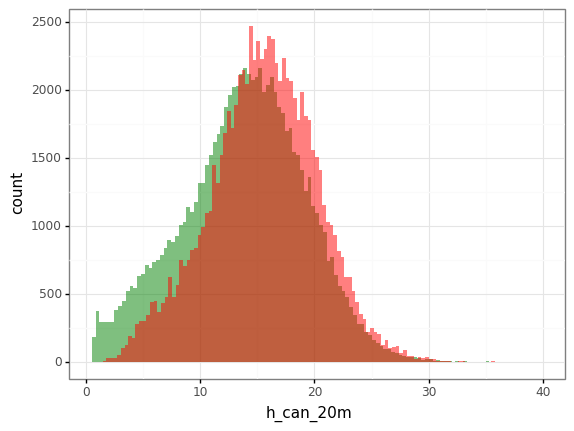

<ggplot: (2936971386505)>

In [15]:
from plotnine import ggplot, aes, geom_histogram, geom_point, geom_smooth, geom_bin2d, geom_abline, xlim, ylim, labs, theme_minimal, theme_bw

(
    ggplot()  # What data to use
    + geom_histogram(aes(x=atl08_gdf.h_can_20m), alpha=0.5, fill='green' )
    + geom_histogram(aes(x=atl08_gdf.h_can), alpha=0.5 , fill='red')
    + theme_bw()
)


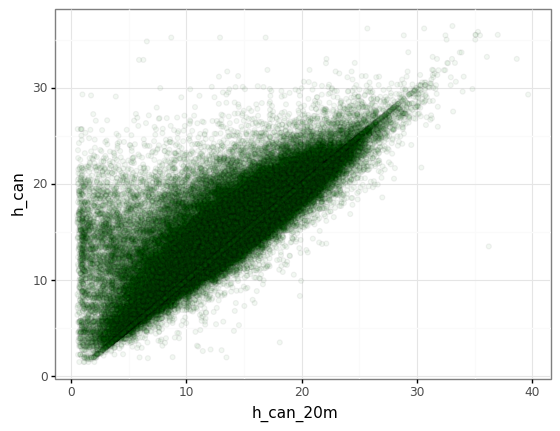

<ggplot: (2936970863557)>

In [14]:
(
    ggplot()  # What data to use
    + geom_point(aes(x=atl08_gdf.h_can_20m, y=atl08_gdf.h_can), alpha=0.05, fill='green' )

    + theme_bw()
)

# Below here --- old stuff - can delete

In [ ]:
%%time
SAMP_FRAC=0.1
# This is the footprints vector of the ~2m HRSI DSM-derived "CHM" data we are playing with..just for reference
#CHM_FOOTPRINTS_FN = '/adapt/nobackup/pmontesa/chm_work/hrsi_chm_senegal/merge.shp'
#maplib.MAP_ATL08_FOLIUM(atl08_gdf.sample(frac=SAMP_FRAC), MAP_COL='h_can', DO_NIGHT=False, LAYER_FN = CHM_FOOTPRINTS_FN, RADIUS=3)
maplib.MAP_ATL08_FOLIUM(atl08_gdf.sample(frac=SAMP_FRAC), MAP_COL='h_can', GROUP_COL='y', DO_NIGHT=False, LAYER_FN = None, RADIUS=3)

In [1]:
atl08_gdf.head()

NameError: name 'atl08_gdf' is not defined

#### Read in a set of ATL08 that had no filtering. Make a static map of all the ATL08 from the conservative thresholds

In [25]:
%%time
main_dir = '/att/gpfsfs/briskfs01/ppl/pmontesa/userfs02/data/icesat2/atl08.005/senegal_no_filt'
atl08_gdf_no_filt = pd.concat([atl08lib.atl08_io(main_dir, str(YEAR), DO_PICKLE=False) for YEAR in range(2018, 2022)])
maplib.MAP_ATL08(atl08_gdf_no_filt, 'senegal','all years', main_dir, YEAR_COL = 'y', proj="+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

Building list of ATL08 csvs: 2018...
0
Empty data frame.
Building list of ATL08 csvs: 2019...
0
Empty data frame.
Building list of ATL08 csvs: 2020...
0
Empty data frame.
Building list of ATL08 csvs: 2021...
0
Empty data frame.
There are 0 ATL08 observations in the Geodataframe.
0


AttributeError: 'DataFrame' object has no attribute 'total_bounds'

### Explore how heavy filtering will decimate the available set of ATL08
#### Run filtering again on top of the unfiltered data, playing with variation in the LC thresholds 
- NOTE : to apply another set of filters on top of previously filtered data, set DO_PREP=False, otherwise it looks for orb_orient and fails....
- well..still fails b/c it wants the orig filter fields ['msw_flg', 'beam_type', 'seg_snow', 'sig_topo'] which get removed after filtering..

In [8]:
class_values = [0, 111, 113, 112, 114, 115, 116, 121, 123, 122, 124, 125, 126, 20, 30, 90, 100, 60, 40, 50, 70, 80, 200] 
# Aggressive filtering of shrubs, herbaceous - GO WITH THIS
class_thresholds_hcan = [0, 60, 60, 60, 60, 60, 60, 50, 50, 50, 50, 50, 50, 15, 10, 10, 5, 5, 15, 0, 0, 0, 0]
dict_lc_h_can_thresh_TEST2 = dict(zip(class_values, class_thresholds_hcan))

In [11]:
# atl08_gdf_filt = FilterUtils.filter_atl08_qual_v3(atl08_gdf, SUBSET_COLS=True, DO_PREP=True,
#                                                            subset_cols_list=['rh25','rh50','rh60','rh70','rh75','rh80','rh90','h_can','h_max_can','seg_landcov'], 
#                                                            #subset_cols_list=atl08_cols_list,
#                                                            filt_cols=['h_can','h_dif_ref','m','msw_flg','beam_type','seg_snow','sig_topo'], 
#                                                            dict_lc_h_can_thresh=dict_lc_h_can_thresh_TEST2, thresh_h_dif=25, thresh_sig_topo=2.5, month_min=1, month_max=12)

atl08_gdf_filt = FilterUtils.filter_atl08_qual_v3(atl08_gdf_no_filt, SUBSET_COLS=True, DO_PREP=False,
                                                              subset_cols_list=['rh25','rh50','rh60','rh70','rh75','rh80','rh90','h_can','h_max_can',
                                                                     'h_te_best','granule_name',
                                                                     'seg_landcov','seg_cover','sol_el','y','m','doy'], 
                                                   filt_cols=['h_can','h_dif_ref','m','msw_flg','beam_type','seg_snow','sig_topo'], 
                                                   list_lc_h_can_thresh=class_thresholds_hcan,
                                                   thresh_h_can=100, thresh_h_dif=25, thresh_sig_topo=2.5, month_min=1, month_max=12)

%%time
maplib.MAP_ATL08_FOLIUM(atl08_gdf_filt, MAP_COL='h_can', DO_NIGHT=False, LAYER_FN = '/att/gpfsfs/briskfs01/ppl/pmontesa/chm_work/hrsi_chm_senegal/merge.shp')


Filtering by quality
	These filter columns not found in input df: ['msw_flg', 'beam_type', 'seg_snow', 'sig_topo']
	No quality filtering done. Returning original df.
